<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CIS9557_bctw/blob/main/cis9557_IBM_HR_attrition_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IBM HR Attrition dataset  

<b>by Professor Patrick, June 2024</b>  
  
The IBM HR Analytics Employee Attrition & Performance dataset is commonly used to demonstrate various business analytics techniques.
  
This dataset includes features like employee age, attrition, department, distance from home, education, job involvement, job level, job satisfaction, and other relevant variables that can be analyzed to understand factors influencing employee retention and performance.  

The IBM HR Analytics Employee Attrition & Performance dataset is an excellent resource for developing a predictive analytics example. Here are several reasons why this dataset is particularly useful:  

- <b>Real-World Relevance</b>: The dataset contains realistic and comprehensive employee data that mirrors what students might encounter in a real-world business environment.  
  
- <b>Diverse Features</b>: It includes various features (age, job role, department, salary, work-life balance, job satisfaction, etc.) that can be used to build complex models and understand different factors affecting employee attrition.  
  
- <b>Predictive Modelling</b>: Students can apply various predictive analytics techniques such as logistic regression, decision trees, random forests, and support vector machines to predict employee attrition.  
  
- <b>Data Preprocessing</b>: The dataset offers opportunities to teach students about data cleaning, feature selection, and transformation—key steps in any predictive analytics project.  
  
- <b>Interpretability</b>: The results from the predictive models can be interpreted and communicated effectively, which is essential for making data-driven business decisions.  




---



##Housekeeping  

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np



---



##Sourcing Data

In [7]:
# Source the dataset
!curl https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/data/main/IBM_Fn-UseC_-HR-Employee-Attrition.csv -o "IBM_HR_Employee_Attrition.csv"

# Load the dataset
data = pd.read_csv('IBM_HR_Employee_Attrition.csv')

# Data preprocessing
data = pd.get_dummies(data, drop_first=True)
X = data.drop('Attrition_Yes', axis=1)
y = data['Attrition_Yes']

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  222k  100  222k    0     0   787k      0 --:--:-- --:--:-- --:--:--  789k




---



## Descriptive Analytics  
  
Here's some code to perform a simple descriptive analysis of the `IBM HR Analytics Employee Attrition & Performance dataset`. This analysis includes loading the dataset, displaying basic information, checking for missing values, and summarizing key statistics for numerical and categorical features.  


1. **Displaying the First Few Rows**:
   - `print(data.head())`: This prints the first few rows of the dataset to give an initial view of the data.

2. **Basic Information**:
   - `print(data.info())`: This provides a summary of the dataset, including the number of non-null entries and data types of each column.

3. **Checking for Missing Values**:
   - `print(data.isnull().sum())`: This checks and displays the number of missing values in each column.

4. **Summary Statistics for Numerical Features**:
   - `print(data.describe())`: This provides summary statistics (count, mean, std, min, 25%, 50%, 75%, max) for the numerical features.

5. **Summary Statistics for Categorical Features**:
   - `print(data.describe(include=['object']))`: This provides summary statistics for categorical features, including the count, unique values, top value, and frequency.

6. **Distribution of the Target Variable (Attrition)**:
   - `print(data['Attrition'].value_counts())`: This displays the distribution of the target variable, showing the counts of employees who stayed and left.

7. **Distribution of Categorical Features**:
   - A loop iterates over each categorical feature to display its distribution using `value_counts()`.


### Basic Exploration  


In [12]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(data.info())


First few rows of the dataset:
   Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   
4   27        591                 2          1              1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1  ...   

   JobRole_Laboratory Technician  JobRole_M

### Descriptive Analysis - Counts   
  

In [19]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Display summary statistics for numerical features
print("\nSummary statistics for numerical features:")
print(data.describe())

# Display summary statistics for categorical features
print("\nSummary statistics for categorical features:")
categorical_features = data.select_dtypes(include=['object', 'category']).columns
for feature in categorical_features:
    print(f"\n{feature} distribution:")
    print(data[feature].value_counts())
if categorical_features.empty:
    print('No categorical features found.')



Missing values in the dataset:
Age                                  0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeCount                        0
EmployeeNumber                       0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion         

### Exploring the Target Variable

In [ ]:
# Display the distribution of the target variable (Attrition)
print("\nDistribution of the target variable (Attrition):")
print(data['Attrition'].value_counts())

###Exploring Categorical Variables  
  

In [ ]:
# Display the distribution of categorical features
print("\nDistribution of categorical features:")
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    print(f"\n{feature} distribution:")
    print(data[feature].value_counts())



---



##Prepare Training Set  

Let's reserve 30% of the data to be used as the test set, while the remaining 70% will be used as the training set.  In other words, 70% of the data will be used to develop the model and the remaining 30% of the data can be used to test the model.

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Here is a simple explanation for each element of the line of code above:

- `X_train, X_test, y_train, y_test`: These are the output variables. `X_train` and `y_train` are the training sets for the features and target variable, respectively, while `X_test` and `y_test` are the test sets for the features and target variable.

- `train_test_split`: This is a function from the `sklearn.model_selection` module that splits arrays or matrices into random train and test subsets.

- `X`: This represents the features of the dataset. It is the input data without the target variable.

- `y`: This represents the target variable or the labels of the dataset. It is the output data we want to predict.

- `test_size=0.3`: This parameter specifies the proportion of the dataset to include in the test split. Here, 30% of the data will be used for testing.

- `random_state=42`: This parameter sets the seed for the random number generator, ensuring that the split of the data into training and test sets is reproducible. Using a specific value (like 42) ensures that the same split will occur each time the code is run.



---



##Transformations  


In [9]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We can break down the code above into the following:

- `scaler = StandardScaler()`: This line creates an instance of the `StandardScaler` class. The `StandardScaler` is a tool used to standardize features by removing the mean and scaling to unit variance, which is useful for ensuring that each feature contributes equally to the model.

- `X_train = scaler.fit_transform(X_train)`: This line first fits the `StandardScaler` to the training data (`X_train`). During this process, it calculates the mean and standard deviation for each feature in the training set. Then, it transforms the training data by subtracting the mean and dividing by the standard deviation, effectively standardizing the features.

- `X_test = scaler.transform(X_test)`: This line transforms the test data (`X_test`) using the same mean and standard deviation calculated from the training data. This ensures that the test data is scaled in the same way as the training data, maintaining consistency between the datasets.



---



##Model Build  

The next step is to accomplish the following:
  
- `model = LogisticRegression()`: This line creates an instance of the `LogisticRegression` class. This model is used for predicting binary outcomes (e.g., whether an employee will leave or stay).
  
- `model.fit(X_train, y_train)`: This line trains the logistic regression model using the training data. `X_train` contains the features (input variables), and `y_train` contains the target variable (output). The `fit` method adjusts the model parameters to best fit the training data, learning the relationship between the features and the target variable.  
  

In [10]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()



---



##Evaluation of Results  


Here is what each part of the following code does and how to interpret the results:

- `y_pred = model.predict(X_test)`: This line uses the trained logistic regression model to make predictions on the test data (`X_test`). The predicted values (`y_pred`) indicate whether the model thinks each test instance belongs to the positive class (e.g., an employee will leave) or the negative class (e.g., an employee will stay).

- `print("Accuracy:", accuracy_score(y_test, y_pred))`: This line calculates and prints the accuracy of the model, which is the proportion of correct predictions out of the total predictions. Accuracy is a measure of how often the model correctly predicts the target variable.

- `print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))`: This line prints the confusion matrix, which is a table showing the number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. It helps to understand how well the model distinguishes between the two classes. The matrix is interpreted as follows:
  - TP: The model correctly predicted the positive class.
  - TN: The model correctly predicted the negative class.
  - FP: The model incorrectly predicted the positive class (false alarm).
  - FN: The model incorrectly predicted the negative class (missed detection).

- `print("Classification Report:\n", classification_report(y_test, y_pred))`: This line prints the classification report, which includes several important metrics:
  - **Precision**: The proportion of positive predictions that are actually correct (TP / (TP + FP)).
  - **Recall**: The proportion of actual positives that are correctly identified (TP / (TP + FN)).
  - **F1-Score**: The harmonic mean of precision and recall, providing a single metric that balances both concerns (2 * (Precision * Recall) / (Precision + Recall)).
  - **Support**: The number of actual occurrences of each class in the test set.

Interpreting these metrics provides a comprehensive understanding of the model's performance, highlighting its strengths and weaknesses in making predictions.

In [11]:
# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8707482993197279
Confusion Matrix:
 [[360  20]
 [ 37  24]]
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.95      0.93       380
        True       0.55      0.39      0.46        61

    accuracy                           0.87       441
   macro avg       0.73      0.67      0.69       441
weighted avg       0.86      0.87      0.86       441





---



## Business Anlaytic Findings  

### Model Analysis

**Model Performance Overview**:
The logistic regression model achieves approximately 87.1% accuracy on the test dataset. This indicates that it correctly predicts employee attrition status (leave or stay) 87.1% of the time.

**Confusion Matrix Analysis**:

- True Negatives (TN): 360
- False Positives (FP): 20
- False Negatives (FN): 37
- True Positives (TP): 24

The confusion matrix suggests that the model effectively identifies employees who will stay (True Negatives), but it has more difficulty identifying those who will leave (True Positives).

**Classification Report**:

- **For employees who stay (False)**:
    - Precision: 0.91
    - Recall: 0.95
    - F1-Score: 0.93
    - Support: 380

The model is highly accurate at predicting employees who will stay, as shown by a high precision (91%) and recall (95%), resulting in a strong F1-score (93%).

- **For employees who leave (True)**:
    - Precision: 0.55
    - Recall: 0.39
    - F1-Score: 0.46
    - Support: 61

The model is less effective at predicting employees who will leave, with a precision of 55% and recall of 39%, which results in a lower F1-score of 46%. This suggests that while the model correctly identifies 55% of employees predicted to leave, it only captures 39% of all employees who actually leave.

**Averages**:

- **Macro Average**:
    - Precision: 0.73
    - Recall: 0.67
    - F1-Score: 0.69

The macro average treats both classes equally without considering their respective frequencies, providing a balanced metric.

- **Weighted Average**:
    - Precision: 0.86
    - Recall: 0.87
    - F1-Score: 0.86

The weighted average takes into account the support (frequency) of each class, providing a performance measure that closely aligns with the model's accuracy.



The logistic regression model has high accuracy and performs well in predicting employees who will stay. However, it's less effective when predicting employees who will leave. To improve the recall and F1-score for the True class, further tuning of the model or exploration of additional features that could better capture the characteristics of employees likely to leave might be necessary.

### Feature Analysis  


#### Feauture Coefficients  
  

The following code analyzes the features used in the model.
  
`coefficients = model.coef_[0]`: Extract the coefficients of the logistic regression model.  `

`features = X.columns`: Get the feature names.  
  
`plt.barh(features, coefficients, align="center")`: Plot the coefficients as a bar chart.  
  
The table `feature_importance` provides a sorted view of the features and their corresponding coefficients, making it easier to interpret the importance of each feature.

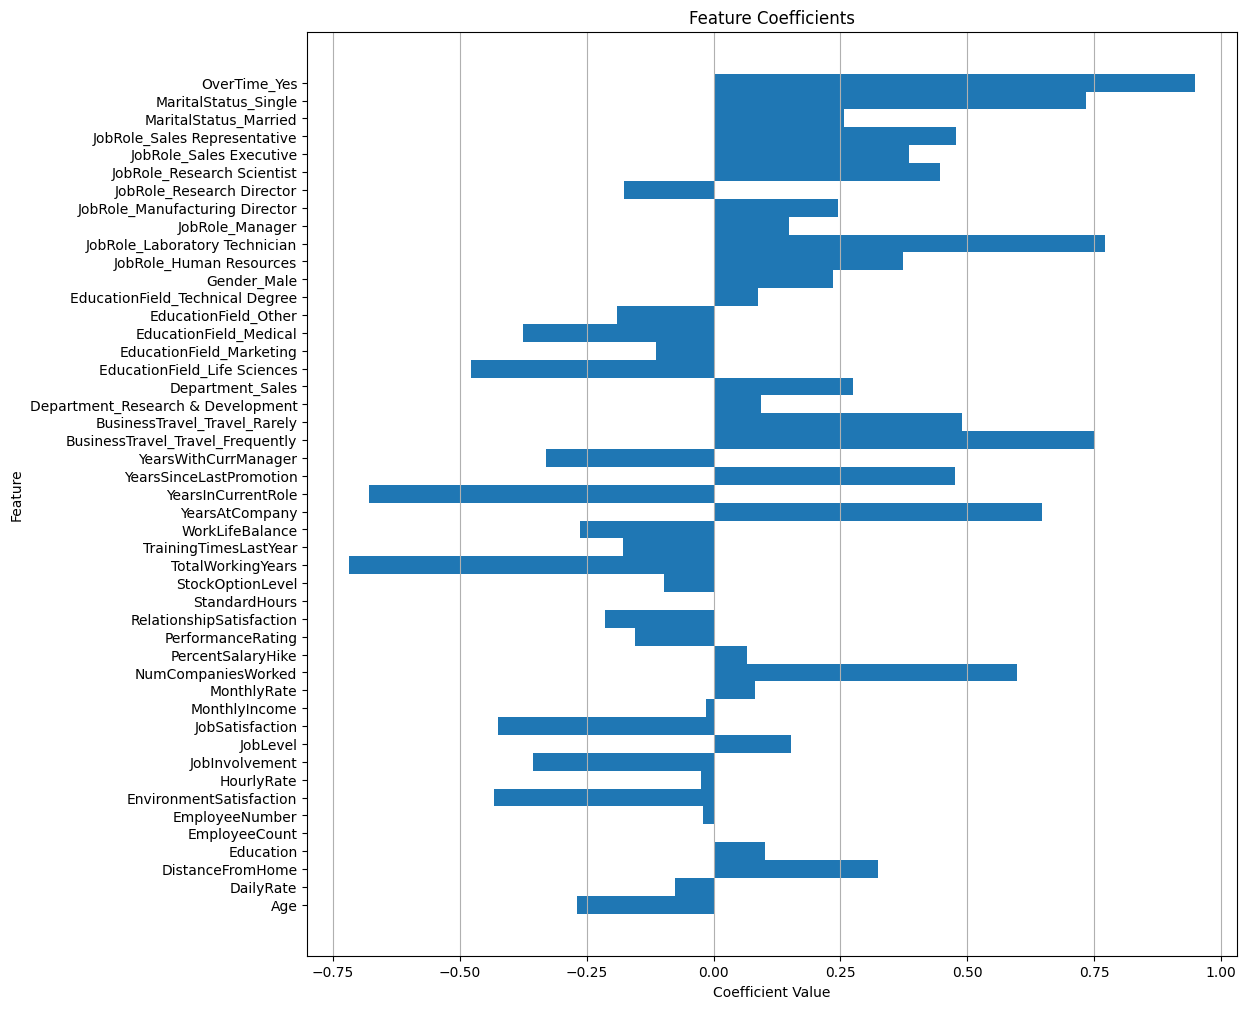

                              Feature  Coefficient
46                       OverTime_Yes     0.948395
37      JobRole_Laboratory Technician     0.772267
26   BusinessTravel_Travel_Frequently     0.748708
45               MaritalStatus_Single     0.733211
22                     YearsAtCompany     0.646623
13                 NumCompaniesWorked     0.597687
27       BusinessTravel_Travel_Rarely     0.489062
43       JobRole_Sales Representative     0.477717
24            YearsSinceLastPromotion     0.475628
41         JobRole_Research Scientist     0.447109
42            JobRole_Sales Executive     0.385575
36            JobRole_Human Resources     0.373636
2                    DistanceFromHome     0.324615
29                   Department_Sales     0.273998
44              MaritalStatus_Married     0.257126
39     JobRole_Manufacturing Director     0.245709
35                        Gender_Male     0.236118
9                            JobLevel     0.152986
38                    JobRole_M

In [28]:
# Get the coefficients and feature names
coefficients = model.coef_[0]
features = X.columns

# Plot the coefficients
plt.figure(figsize=(12, 12))
plt.title("Feature Coefficients")
y_pos = np.arange(len(features))
plt.barh(y_pos, coefficients, align="center", height=1.0)  # Adjust height for more spacing
plt.yticks(y_pos, features)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(axis='x')
plt.show()

# Display the coefficients in a table for better readability
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)

#### Features by Impact     
  

There are many feautures included in the model.  Let's look at the most impactful features that positively impact employee attrition, and let's look at the features that have the greatest negative impact on employee attrition (our target value).  

In [29]:
# Create a DataFrame for the coefficients
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort the DataFrame by the coefficient values
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# List the most impactful positive and negative coefficient features
print("Most Impactful Positive Coefficient Features:")
print(feature_importance.head())

print("\nMost Impactful Negative Coefficient Features:")
print(feature_importance.tail())

Most Impactful Positive Coefficient Features:
                             Feature  Coefficient
46                      OverTime_Yes     0.948395
37     JobRole_Laboratory Technician     0.772267
26  BusinessTravel_Travel_Frequently     0.748708
45              MaritalStatus_Single     0.733211
22                    YearsAtCompany     0.646623

Most Impactful Negative Coefficient Features:
                         Feature  Coefficient
10               JobSatisfaction    -0.424867
6        EnvironmentSatisfaction    -0.431876
30  EducationField_Life Sciences    -0.477180
23            YearsInCurrentRole    -0.678319
19             TotalWorkingYears    -0.717514




---

